#  MODELLING PEDESTRIAN CROSSING BEHAVIOUR

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

In [32]:
df = pd.read_excel(r"C:\Users\sunny\Desktop\for_analysis.xlsx")

In [33]:
df

,Gender,Age,Group size,Waiting time (Sec),Crossing time,Ped speed,Category,Veh speed,Ped Density,Veh density,PET,Veh speed voilation,Pedestrian behaviour,No. of stops
0,Male,18-24,0,11.00,8.000000,1.520000,4W,18.000000,0.031746,0.017544,1.000,0,0,1
1,Female,18-24,1,1.80,9.067143,1.213172,4W,13.267000,0.063095,0.020025,1.000,0,0,1
2,Male,25-34,0,4.20,9.250000,1.210000,3W,13.230000,0.076190,0.031053,1.000,0,0,1
3,Female,35-44,0,2.97,9.322034,1.180000,2W,12.727273,0.023810,0.020050,2.750,0,0,1
4,Female,35-44,0,2.44,9.649123,1.140000,2W,12.727273,0.083333,0.017544,4.800,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Female,45-60,1,10.00,11.224490,0.980000,3W,5.833333,0.083333,0.017544,3.950,1,0,1
236,Female,18-24,1,10.00,12.500000,0.880000,2W,5.833333,0.043651,0.023810,3.970,1,0,0
237,Female,45-60,1,12.00,10.679612,1.030000,3W,7.777778,0.047619,0.010025,3.973,1,0,2
238,Female,45-60,1,11.00,11.578947,0.950000,3W,11.111111,0.035714,0.018797,3.978,1,0,1


In [34]:
df.describe()

,Group size,Waiting time (Sec),Crossing time,Ped speed,Veh speed,Ped Density,Veh density,PET,Veh speed voilation,Pedestrian behaviour,No. of stops
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.591667,9.824083,12.848505,1.041935,11.081196,0.052709,0.023584,3.321396,0.554167,0.412500,1.775000
std,0.492553,7.066059,4.109290,0.202879,3.265044,0.019924,0.007446,1.707107,0.498096,0.493313,1.089797
min,0.000000,0.000000,7.857143,0.301307,3.956044,0.023810,0.010025,1.000000,0.000000,0.000000,0.000000
25%,0.000000,3.840000,9.785113,0.920000,8.611111,0.041667,0.020025,2.157750,0.000000,0.000000,1.000000
50%,1.000000,9.000000,12.000000,1.010000,10.846667,0.047619,0.022556,3.000000,1.000000,0.000000,2.000000
75%,1.000000,13.000000,14.285714,1.200000,13.239250,0.057143,0.025038,3.917250,1.000000,1.000000,3.000000
max,1.000000,36.250000,36.507628,1.520000,19.444444,0.103175,0.042581,9.540000,1.000000,1.000000,4.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                240 non-null    object 
 1   Age                   240 non-null    object 
 2   Group size            240 non-null    int64  
 3   Waiting time (Sec)    240 non-null    float64
 4   Crossing time         240 non-null    float64
 5   Ped speed             240 non-null    float64
 6   Category              240 non-null    object 
 7   Veh speed             240 non-null    float64
 8   Ped Density           240 non-null    float64
 9   Veh density           240 non-null    float64
 10  PET                   240 non-null    float64
 11  Veh speed voilation   240 non-null    int64  
 12  Pedestrian behaviour  240 non-null    int64  
 13  No. of stops          240 non-null    int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 26.4+ KB


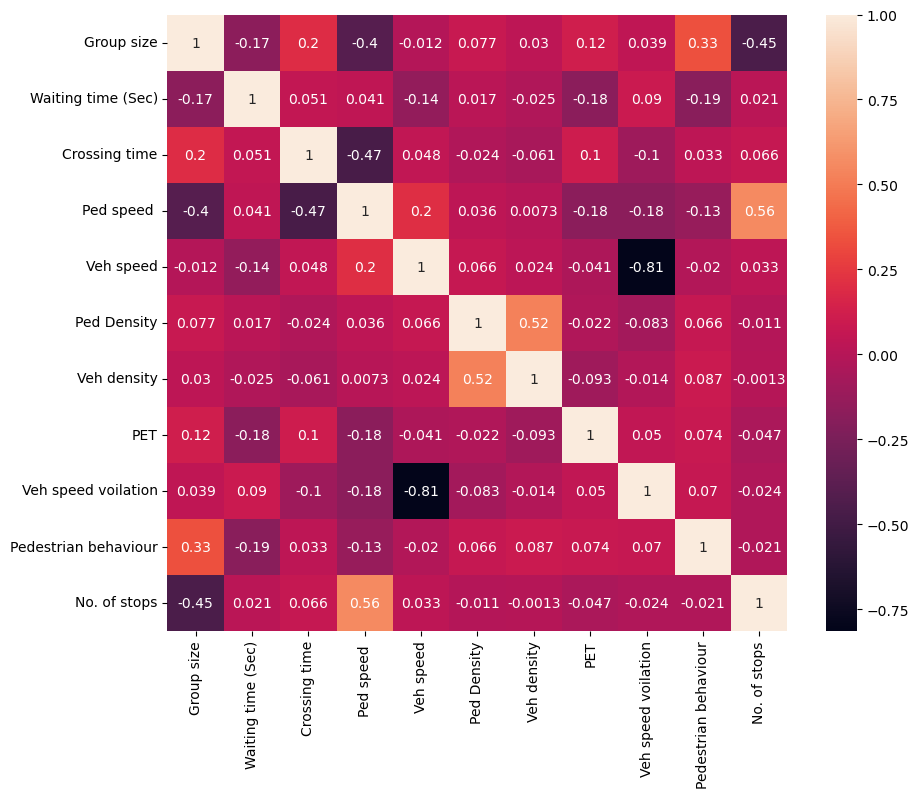

In [36]:
sns.heatmap(df.corr(), annot= True)
plt.rcParams['figure.figsize'] = (10,8)

In [37]:
df['Age'].unique()

array(['18-24', '25-34', '35-44', '45-60', '60 above', 'below 18'],
      dtype=object)

In [38]:

df['Age'].replace({'below 18': 'Child',
                   '18-24': 'Teenager',
                   '25-34': 'Youth',
                   '35-44': 'Adult',
                   '45-60': 'Adult',
                   '60 above':'Older'}, inplace=True)


In [39]:
df['Age'].unique()

array(['Teenager', 'Youth', 'Adult', 'Older', 'Child'], dtype=object)

In [40]:
df

,Gender,Age,Group size,Waiting time (Sec),Crossing time,Ped speed,Category,Veh speed,Ped Density,Veh density,PET,Veh speed voilation,Pedestrian behaviour,No. of stops
0,Male,Teenager,0,11.00,8.000000,1.520000,4W,18.000000,0.031746,0.017544,1.000,0,0,1
1,Female,Teenager,1,1.80,9.067143,1.213172,4W,13.267000,0.063095,0.020025,1.000,0,0,1
2,Male,Youth,0,4.20,9.250000,1.210000,3W,13.230000,0.076190,0.031053,1.000,0,0,1
3,Female,Adult,0,2.97,9.322034,1.180000,2W,12.727273,0.023810,0.020050,2.750,0,0,1
4,Female,Adult,0,2.44,9.649123,1.140000,2W,12.727273,0.083333,0.017544,4.800,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Female,Adult,1,10.00,11.224490,0.980000,3W,5.833333,0.083333,0.017544,3.950,1,0,1
236,Female,Teenager,1,10.00,12.500000,0.880000,2W,5.833333,0.043651,0.023810,3.970,1,0,0
237,Female,Adult,1,12.00,10.679612,1.030000,3W,7.777778,0.047619,0.010025,3.973,1,0,2
238,Female,Adult,1,11.00,11.578947,0.950000,3W,11.111111,0.035714,0.018797,3.978,1,0,1


In [41]:
df.columns

Index(['Gender', 'Age', 'Group size', 'Waiting time (Sec)', 'Crossing time',
       'Ped speed ', 'Category', 'Veh speed', 'Ped Density', 'Veh density',
       'PET', 'Veh speed voilation', 'Pedestrian behaviour', 'No. of stops'],
      dtype='object')

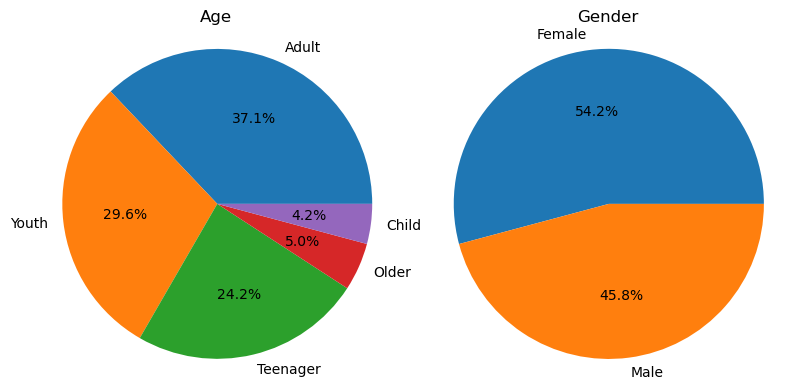

In [42]:
categories = ['Age', 'Gender']
num_rows = 1
num_cols = len(categories)
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 4))

for i, category in enumerate(categories):
    category_counts = df[category].value_counts()
    axs[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
    axs[i].set_title(category)
    axs[i].axis('equal')
plt.tight_layout()
plt.show()


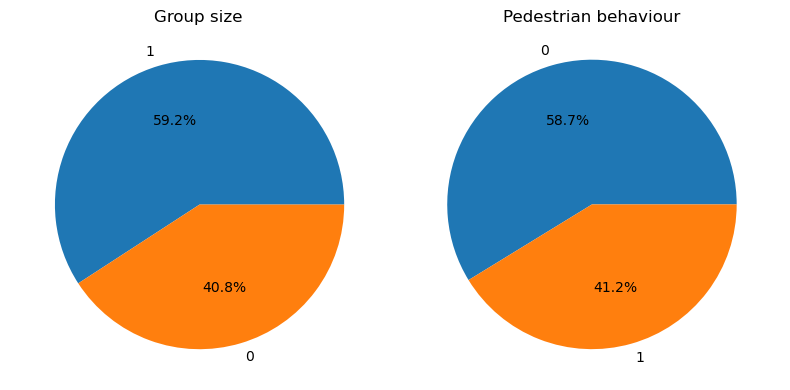

In [43]:
categories = ['Group size', 'Pedestrian behaviour']
num_rows = 1
num_cols = len(categories)
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 4))

for i, category in enumerate(categories):
    category_counts = df[category].value_counts()
    axs[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
    axs[i].set_title(category)
    axs[i].axis('equal')
plt.tight_layout()
plt.show()


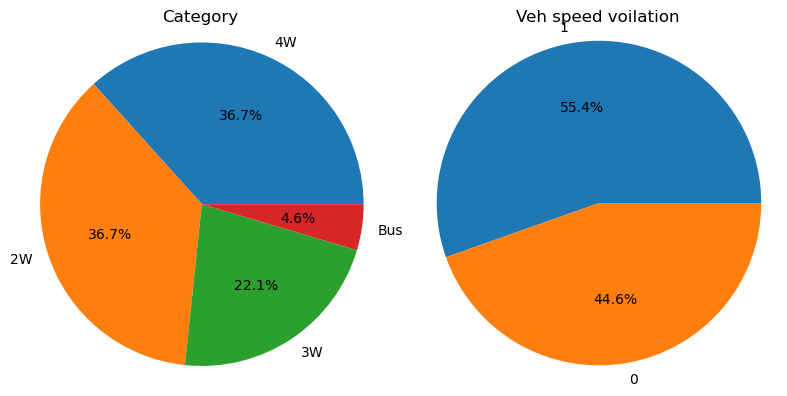

In [44]:
categories = ['Category', 'Veh speed voilation']
num_rows = 1
num_cols = len(categories)
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 4))

for i, category in enumerate(categories):
    category_counts = df[category].value_counts()
    axs[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
    axs[i].set_title(category)
    axs[i].axis('equal')
plt.tight_layout()
plt.show()


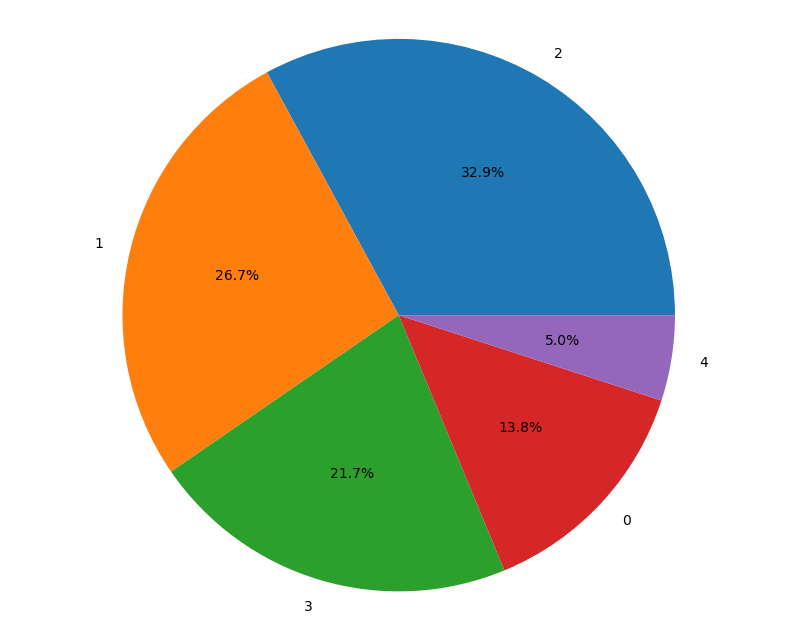

In [45]:
stop_count = df['No. of stops'].value_counts()
plt.pie(stop_count, labels=stop_count.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()


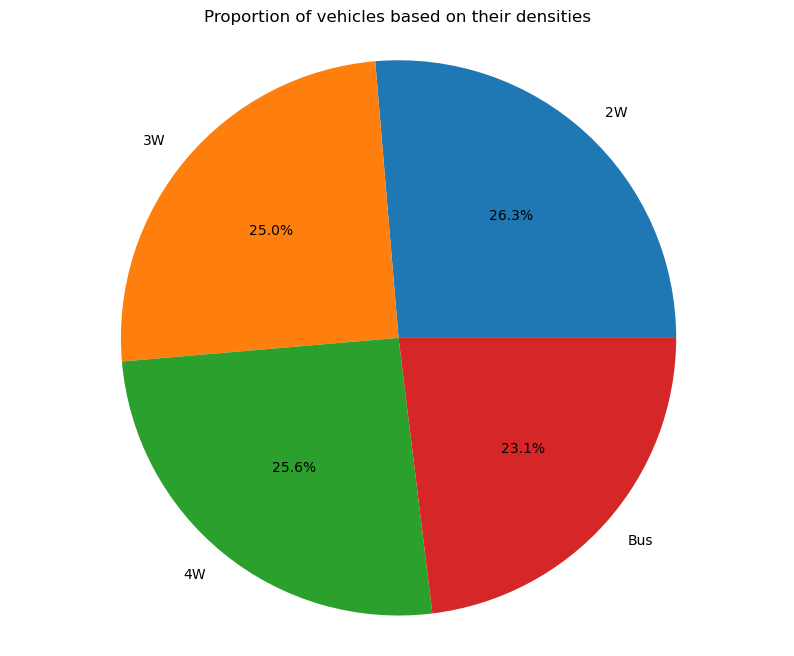

In [46]:
vehicle_data = df.groupby('Category').mean()['Veh density']
plt.pie(vehicle_data, labels=vehicle_data.index, autopct='%1.1f%%')
plt.title('Proportion of vehicles based on their densities')
plt.axis('equal')
plt.show()

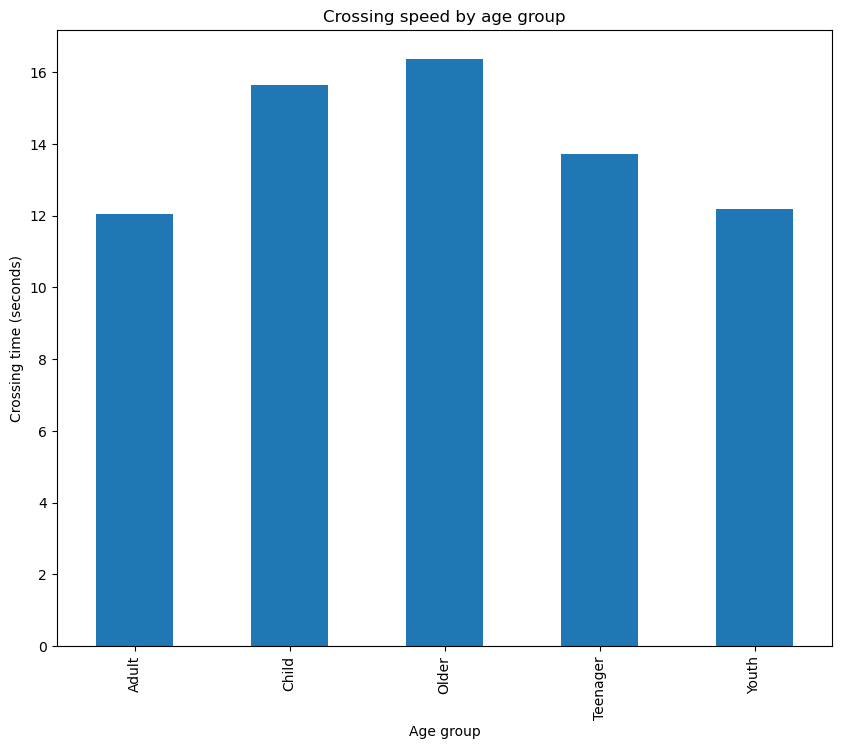

In [47]:
age_data = df.groupby('Age')['Crossing time'].mean()

# create a bar plot
age_data.plot(kind='bar')
plt.title('Crossing speed by age group')
plt.xlabel('Age group')
plt.ylabel('Crossing time (seconds)')

# display the plot
plt.show()


-  It can be seen that the crossing speed of 
older pedestrians was slower than other age groups.

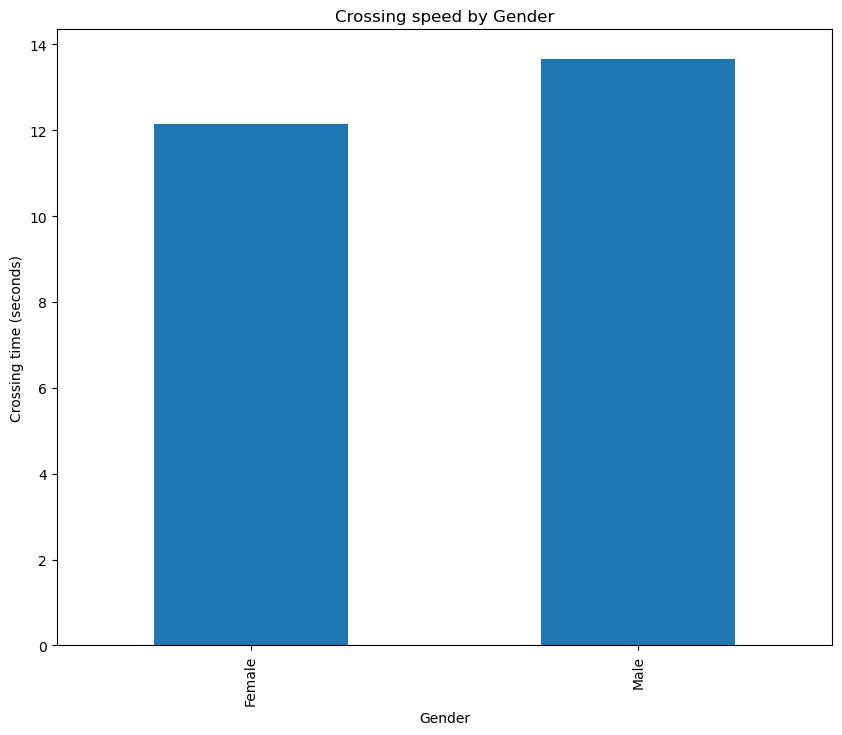

In [48]:
gender_data = df.groupby('Gender')['Crossing time'].mean()

# create a bar plot
gender_data.plot(kind='bar')
plt.title('Crossing speed by Gender')
plt.xlabel('Gender')
plt.ylabel('Crossing time (seconds)')

# display the plot
plt.show()

- Figure shows the crossing speed of male and female pedestrians. It shows 
 Male pedestrians were crossing at a higher speed than femmale pedestrians

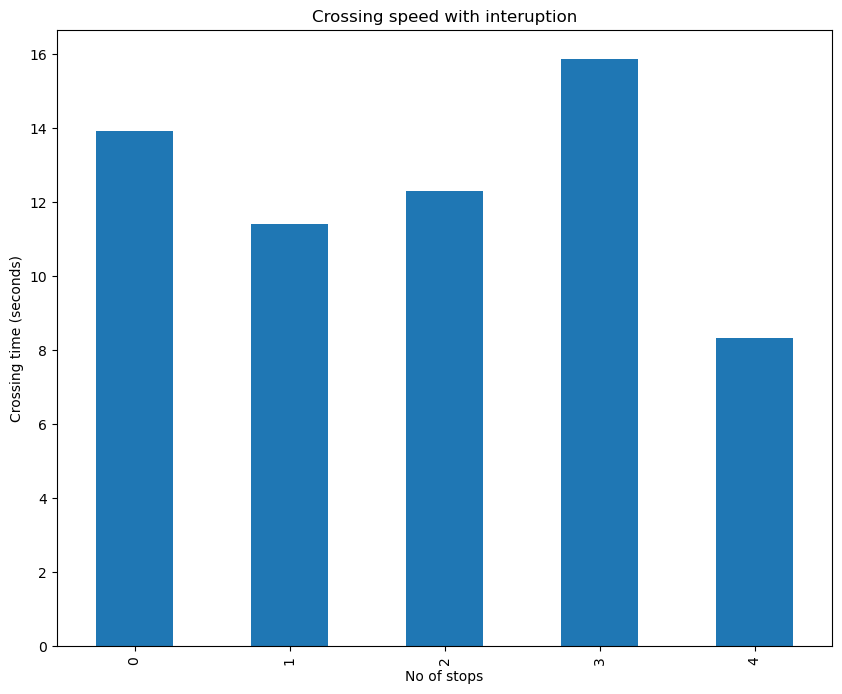

In [49]:
stop_data = df.groupby('No. of stops')['Crossing time'].mean()

# create a bar plot
stop_data.plot(kind='bar')
plt.title('Crossing speed with interuption')
plt.xlabel('No of stops')
plt.ylabel('Crossing time (seconds)')

# display the plot
plt.show()

-  shows the crossing speeds of pedestrians with 
interruptions and the number of times they stopped.

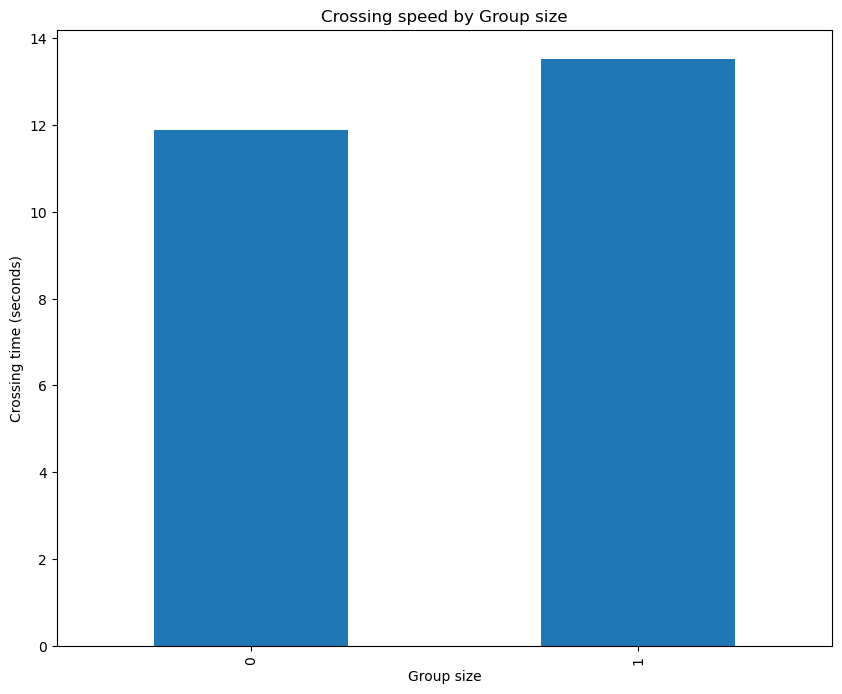

In [50]:
group_data = df.groupby('Group size')['Crossing time'].mean()

# create a bar plot
group_data.plot(kind='bar')
plt.title('Crossing speed by Group size')
plt.xlabel('Group size')
plt.ylabel('Crossing time (seconds)')

# display the plot
plt.show()

- shows the crossing 
speed of pedestrians in and not in a group.

In [51]:
le = LabelEncoder()

df['Age'] = le.fit_transform(df['Age'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Category'] = le.fit_transform(df['Category'])

In [52]:
# calculate the Pearson correlation coefficient and p-value
#df['Crossing time'] = pd.to_numeric(df['Crossing time'], errors='coerce')


corr, p_value = pearsonr(df['Age'], df['Crossing time'])

# print the results
print("Pearson correlation coefficient: ", corr)
print("p-value: ", p_value)

Pearson correlation coefficient:  0.04242237090376452
p-value:  0.513068061200452


In [53]:
df.head()

,Gender,Age,Group size,Waiting time (Sec),Crossing time,Ped speed,Category,Veh speed,Ped Density,Veh density,PET,Veh speed voilation,Pedestrian behaviour,No. of stops
0,1,3,0,11.00,8.000000,1.520000,2,18.000000,0.031746,0.017544,1.00,0,0,1
1,0,3,1,1.80,9.067143,1.213172,2,13.267000,0.063095,0.020025,1.00,0,0,1
2,1,4,0,4.20,9.250000,1.210000,1,13.230000,0.076190,0.031053,1.00,0,0,1
3,0,0,0,2.97,9.322034,1.180000,0,12.727273,0.023810,0.020050,2.75,0,0,1
4,0,0,0,2.44,9.649123,1.140000,0,12.727273,0.083333,0.017544,4.80,0,0,1


In [62]:
df.columns

Index(['Gender', 'Age', 'Group size', 'Waiting time (Sec)', 'Crossing time',
       'Ped speed ', 'Category', 'Veh speed', 'Ped Density', 'Veh density',
       'PET', 'Veh speed voilation', 'Pedestrian behaviour', 'No. of stops'],
      dtype='object')